# Chap 3. Linear Filters

## Digital Image
- discretized in the spatial domain
- discretized in the brightness domain

<br>

## Linear Filtering
: Form a new image whose pixels are a combination of the original pixels

🧐 WHY?
- Extract useful information from the images = Features
- Modify or enhance image properties = De-nosing, Super-resolution, In-painting

👉 Linear Filter's key Properties
- Linearity 

    filter(h1+h2) = filter(h1) + filter(h2)

- Shift Invariance : Same behavior regardless of pixel location 

    filter(shift(h)) = shift(filter(h))

- Theoretical result : Any linear shift-invariant operator can be represented as a convolution

## Point processing VS Filters

1️⃣ **Point** Operation = homogeneous point operations

 : Each new pixel value I'(u,v) depends on the previous value I(u,v) at the same position and on a mapping function f without changing the size, geometry, or local structure of the image.

- Cannot accomplish tasks like **sharpening** or **smoothing**


2️⃣ **Neighborhood** Operation

- Linear Shift-Invariant Image Filtering : The same kernel is shifted to all pixel locations so that all pixels use the same linear combination of their neighbors

- Linear case is the simplest and most useful 

👉 The bigger the mask.
- More neighbors contribute
- Smaller noise variance of the output
- Bigger noise spread
- more blurring
- more expensive to compute


<br>

## Padding

1️⃣ Same padding : output size is same as input size 

    p = ( kernel - 1) / 2

2️⃣ Valid padding : output size is difference of sizes of input size and kernel size

    output size = ( input size - kernel size ) / stride + 1

3️⃣ Full padding : output size is sum of sizes of input size and kernel size


<br>

## Gaussian Filter

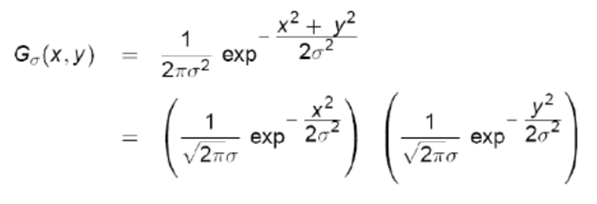

- 배경 : Smoothing by Averaging의 문제점인 smoothing with box filter revisited로 인한 격자 무늬 생김 현상을 없애기 위함

- To eliminate edge effects, weight contribution of neighborhood pixels according th their closeness to the center

- Standard deviation determines extent of smoothing.

### 👉 Advantages of Gaussian filtering
- Rotationally symmetric for large filters
- filter weights decrease monotonically from central peak, giving most weight to central pixels
- Simple and intuitive relationship between size of Standard deviation and the smoothing.
- Convolution of a Gaussian with itself is another Gaussian.

### 👉 Advantages of Seperability
- For a k x k Gaussian filter, 2D convolution requires k^2 operations per pixel
  - n x n image에 적용되는 complexity : O( n^2 m^2 )
- BUT using the separable filters, we reduce this to 2k operations per pixel
  - n x n image에 적용되는 complexity : O( n^2 m )

## Noise 
- Salt and Pepper noise : contains random occurrences of black and white pixels
- Impulse noise : contains random occurrences of white pixels
- Gaussian noise : variations in intensity drawn from a Gaussian normal distribution

<br>

## Non-linear Filtering
### Median filter
: replace each pixel with the MEDIAN value of all the pixels in the neighborhood

👉 Advantage of Median filters
- does not spread noise
- Remove spike noise : Good for impulse, salt&pepper noise
- Less sensitive to outliers compared to mean filter
- expensive to run 

<br>

## Convolution VS Cross-correlation

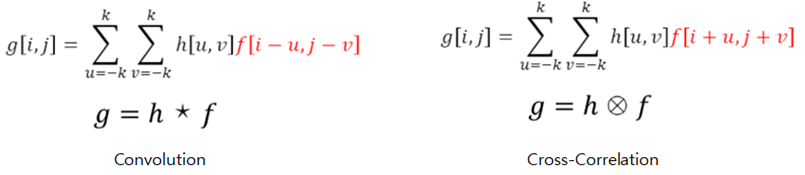

1️⃣ Convolution

- Integral that expresses the amount of overlap of one function as it is shifted over another function
- Convolution is a filtering operation

2️⃣ Cross-correlation

- Computes a measure of similarity of two input signals as they are shifted by one another
- The correlation result reaches a maximum at the time when the two signals match best
- Correlation is a measure of relatedness of two signals

<br>

###👉 Properties of Convolution

- Commutativity

    f * g = g * f

- Associativity

    f * ( g * h ) =  ( f * g ) * h 

- Distributivity

    f * ( g * h ) =  ( f * g ) + ( f * h ) 

- Associativity with scalar multiplication

    c ( f * g ) = (cf) * g

- Differentiation

    d/dx( f * g ) = df/dx * g = f * dg/dx



#Edges
: Edge is a place of rapid change in the image intensity function

##Edges are caused by a varielty of factors
- surface normal discontinuity
- depth discontinuity
- surface color discontinuity
- illumination discontinuity

##Edge detecting
: noise filter + edge detection

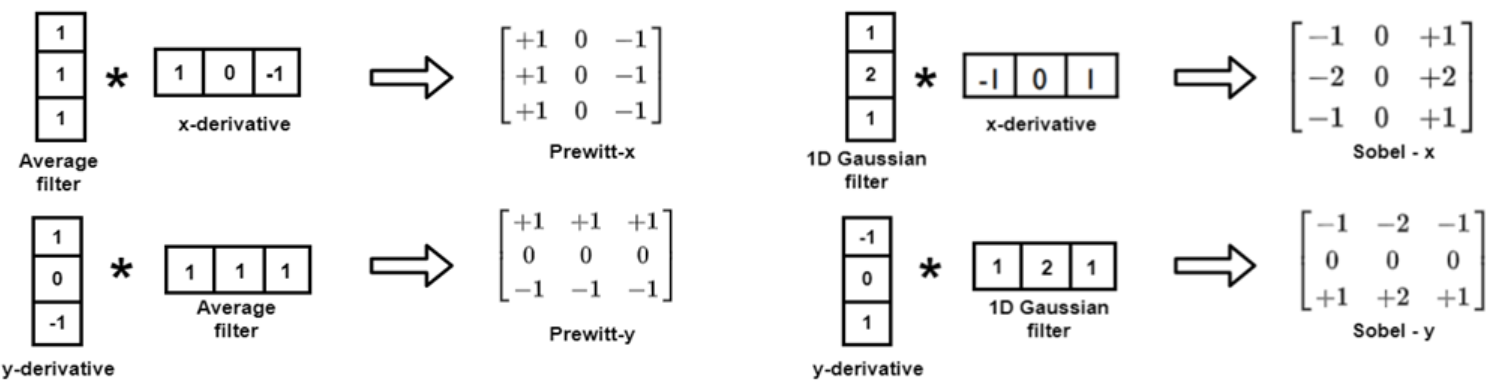

## Derivative of Gaussian filter

: 가우시안 + 미분 필터 가우시안 미분 필터로 한번에 연산 가능함

- separable

## Laplacian of Gaussian 

- non - separable

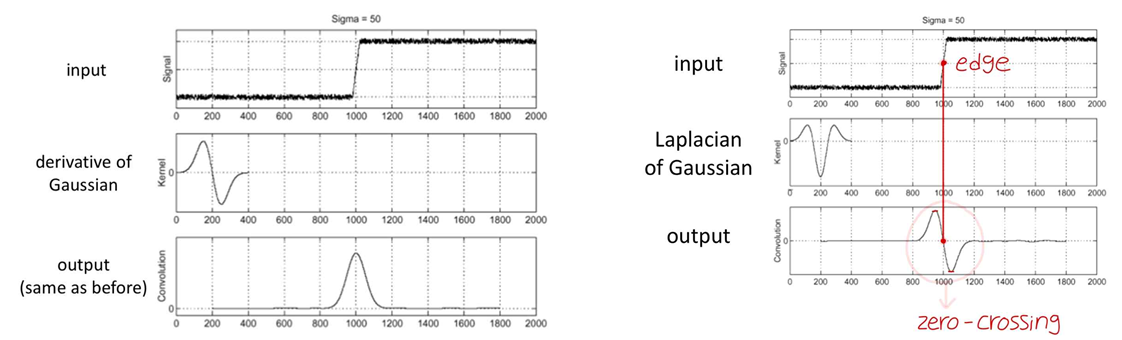

# Chap 4. Image Pyramids 

## Aliasing
: Occurs when your sampling rate is not hig enough to capture the amout of detail in your image
### Reason
- sampling rate mismatch
- moire : object이 한 픽셀 중 R, G, B 한 곳에 집중되게 matching 
- temporal aliasing : FPS(frame per second) 

<br>

###👉 Solution

1️⃣ Oversample the signal
- minimum sampling rate is called the Nyquest rate


    Sampling Rate >= 2 * Max Frequency in the image
                   = two samples per cycle 
    fs >= 2 * f0
    T0 >= 2 * Ts

2️⃣ Filter the image, then subsample
: Remove some of the detail effects that cause aliasing
- Lose information, but better than aliasing artifacts

<br>

## Gaussian Pyramid
- Anti-aliasing 하기 위해 Gaussian filter 적용 후, Delete(행, 열 삭제)하는 반복 작업이 오래 걸림
- mip map을 만들면 원래 용량의 4/3배 증가함
- BUT, reconstruct를 하면 화질이 많이 떨어짐 ⏩ super resolution을 해야함
- Adds scale invariance to fixed-size algorithms

## Laplacian Pyramid

At each level, retain the residuals instead of the blurred images themselves.

⏩ Reconstruct 가능

<br>

## Wavelet Transformation 
- Wavelet coding is a variant of Discrete Cosine Transform(DCT) coding that uses wavelets instead of DCT's block-based algorithm

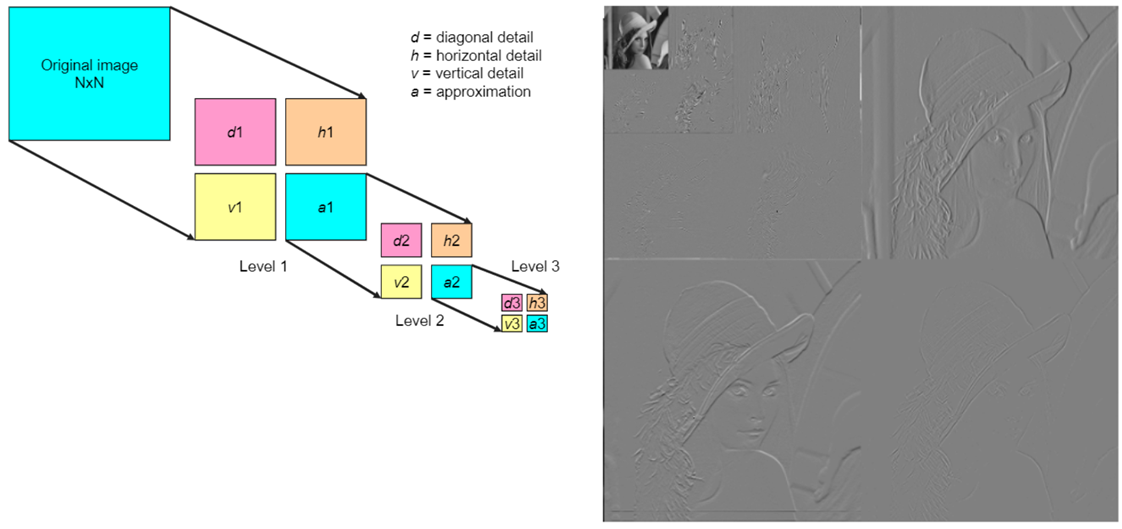

# Chap 5. Local Feature Detection 

## 👉 Advantages of Local Features

1️⃣ Locality

: Features are local, so robust to occlusion and clutter

2️⃣ Quantity

: Hundreds or thousands in a single image

3️⃣ Distinctiveness

: Can differentiate a large database of objects

4️⃣ Efficiency

: Real-time performance achievable

<br>

## 👉 Local Features

### **Point Detection**

1️⃣ Edge Detection

- Prewitt operator, Sobel operator, Robert's cross operator

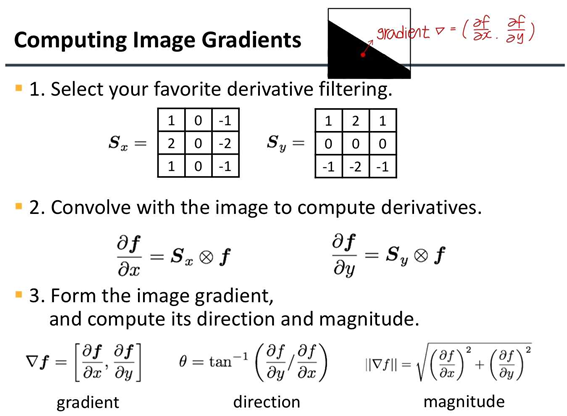

- Trade-off between edge strength and noise reduction

<br>

### Major Issue
- The gradient magnitude at different scales is different
- The gradient magnitude is large along thick trail
- How do we link the relevant points up into curves?

<br>


2️⃣ Line Detection

- Edge Detection & Non-maximum Suppression 
- Connected components on edge pixels with similar orientation
- Canny Operator, Hough Transform

###👉 Canny Edge Detector
1. Filter image with derivative of Gaussian
2. Find magnitude and orientation of gradient
3. Non-maximum Suppresion
    - Check if a pixel is local maximum along gradient direction 
    - Then, construct the tangent to the dege curve and use this to predict the next points
4. Hysteresis thresholding 
    - Use a high threshold to start edge curves and a low threshold to continue them

###👉 Hough Transform 
: Used to isolate features of a particular shape within an image
- To find the location of lines/circles/parametric curves in images
- Robust detection under noise and partial occlusion 

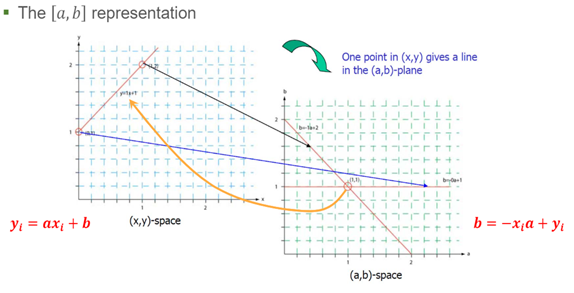

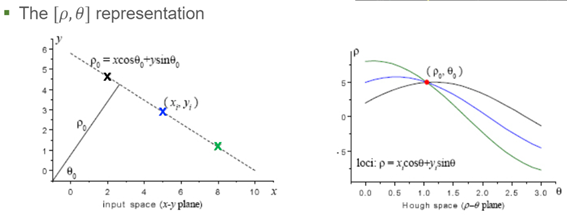


<br>

### **Region Detection**

3️⃣ Corner Detection by **Harris Corner Detector**

1. Compute image gradients over small region

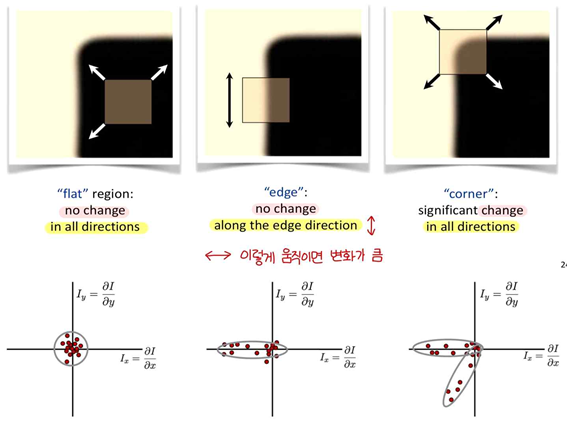

2. Subtract mean from each image gradient

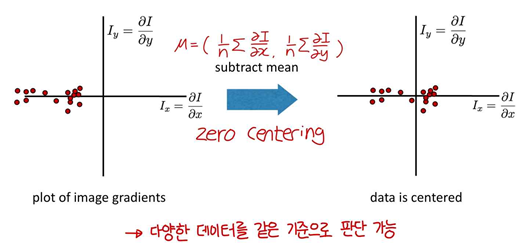

3. Compute the covariance matrix from the entries in the gradient

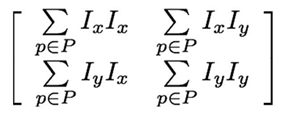

<br>

🧐 **WHY?** Change of intensity for the shift [u, v]을 구하기 위해서 ❗️

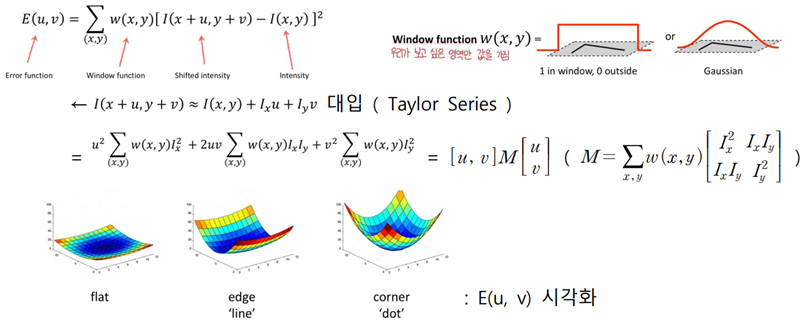


4. Compute eigenvector and eigenvalues on Covariance Matrix

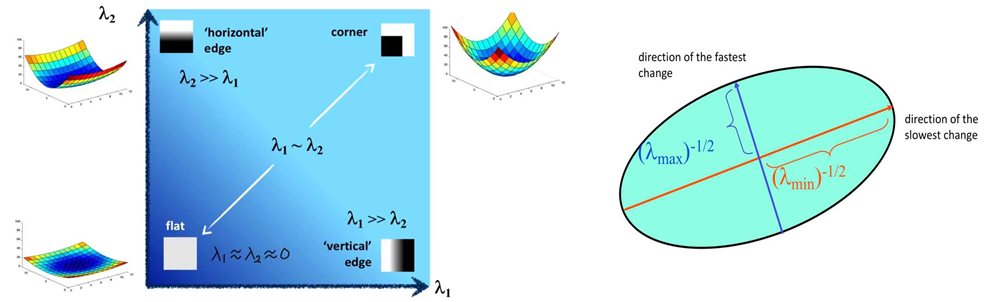

<br>

### Want E(u,v) to be large for small shifts in all direction s
- The minimum of E(u,v) should be large, over all unit vectors [u,v]]
- this minimum is given by the smaller eigenvalues of M

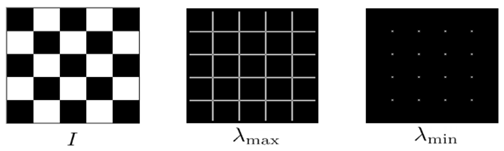



<br>

5.  use threshold on eigenvalues to detect corners 

        threshold(R) = det(M) - k x trace(M)^2 

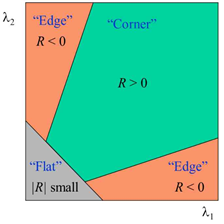

- Find points with large response λ_min > threshold

<br>

6. Nonmaximal Suppression

<br>

###👉 Properties of Harris Detector 
- Invariant : Intensity shift
- Partially Invariant : Intensity Scaling, affine 변화, 조명(illumination) 변화
- Covariant : Translation, Rotation
- Not Invariant : Scaling

<br>

✅ Covariant : 

    features(transform(image)) = transform(features(image))

✅ Invariant :

    features(transform(image)) = feature(image)


<br>

4️⃣ Blob Detection by **Laplacian of Gaussian ( LoG )**

### From edges to blobs
- Edge = ripple
- Blob = Superposition of two ripples
- **Spatial Selection** : The magnitude of the Laplacian response will achieve a maximum at the center of the blob, provided the scale of the Laplacian is "matched" to the scale of the blob

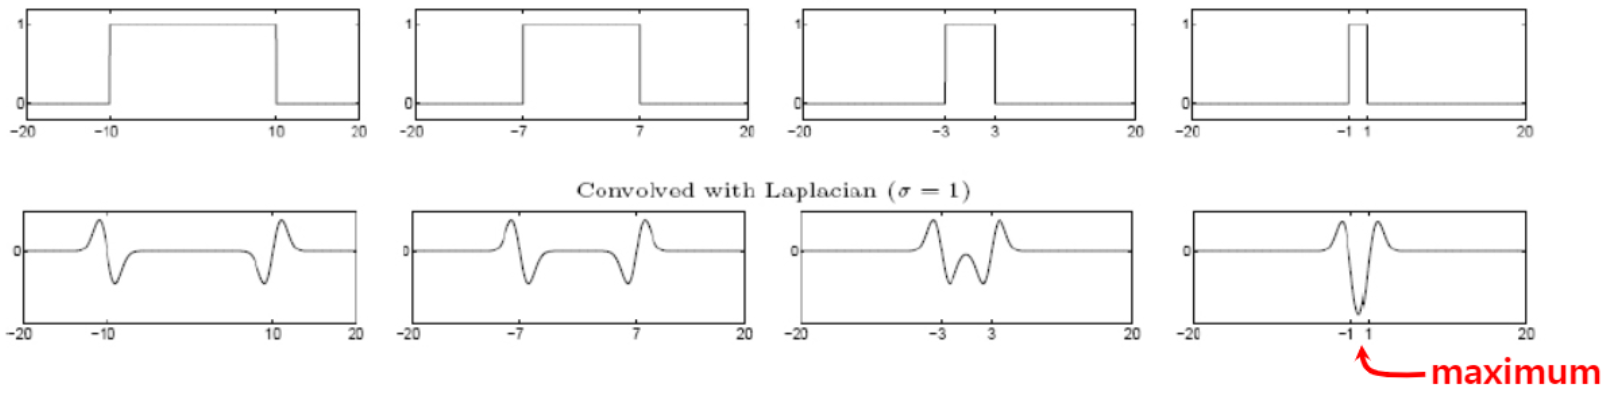

- **Scale Selection**
  - Laplacian response decays as scale increases
  - **Scale Normalization** 필요 : multiplied by σ^2
  - Laplacian of Gaussian : 

    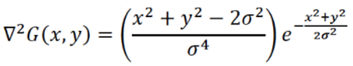
  - normalization 해주면 σ^4이 없어지므로 
  - **Characteristic Scale** : Maximum response occurs at σ = r / sqrt(2)

### Efficient implementation

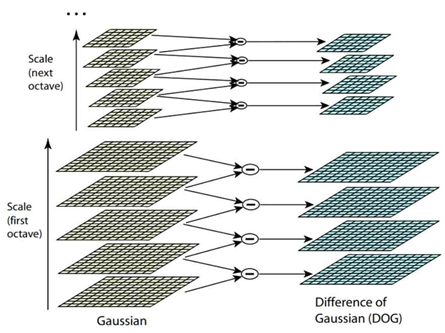

: Difference of Gaussians( DoG )를 적용한 인접 이미지들간의 차(subtraction)는 LoG(Laplacian of Gaussian) 필터를 적용한 것과 거의 동일한 결과를 가짐.

### 👉 Properties of Blob Detection
- Blob location and scale is **covariant** w.r.t. rotation and scaling
- Laplacian (blob) response is **invariant** w.r.t. rotation and scaling

<br>

### From **covariant detection** to **invariant description**


<br>

# Chap 6. Feature Descriptors


## 👉 Characteristics of good features

1️⃣ Repeatability 

: The same feature can be found in several images despite geometric and photometric transformations

2️⃣ Saliency 

: Each feature is distinctive
 
3️⃣ Compactness and efficiency 

: Many fewer features than image pixels

4️⃣ Locality 

: A feature occupies a relatively small area of the image

  - Robust to clutter and occlusion

<br>

### Point Descriptor should be **Invariant** and **Distinctive**

<br>

### 전통적인 Descriptors
1. Image Patch 
- Perfectly fine if geometry and appearance is unchanged
- Sensitive to intensity values

2. Image Gradient(= Binary Descriptor) 
- Invariant to Intensity values
- Sensitive to Deformation 

3. Clor Histogram 
- Invariant to changes in Scale and Rotation
- Different images may have same histogram

<br>

## 👉 Scale Invariant Feature Transfrom ( SIFT )
- 기존의 Harris 코너가 영상의 Scale 변화에 민감한 문제를 해결하기 위하여 Laplacian을 근사한 DoG(Difference of Gaussian)를 기반으로 이미지 내에서 뿐만 아니라 Scale 축( Image Pyramid )으로도 극대점을 찾음
- Scale에 불변인 특징점을 찾으면 입력 이미지의 Scale이 어떻게 주어지더라도 해당 특징점을 찾아낼 수 있음

<br>

-  Invariant Local Feature 
  - Image content is transformed into local feature coordinates that are invariant to translation, rotation, scale, and other imaging paramters

<br>

1️⃣ Enforce Invariance to scale 

: Compute Gaussian Difference max, for may different scales

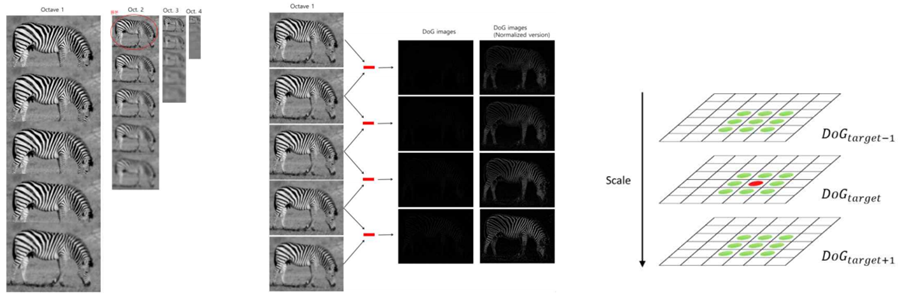



2️⃣ Localizable corner 

- Remove Inappropriate keypoints ( threshold )

3️⃣ Elimiate edges

- Eliminate the edge responses based on Harris Response Function
  - Laplacian has strong response along edge

4️⃣ Enforce Invariance to Orientation

: Compute Orientation, to achieve rotation invariance, by finding the strongest second derivative direction in the smoothed image. Rotate patch so that orientation points up.

- Normalization : transform these regions into same-size circles rotated to a consistent reference orientation

- Select canonical orientation : Create histogram of local gradient directions computed at selected scale

5️⃣ Compute feature signature

: Compute a "gradient histogram" of the local image region in a 4x4 pixel region. Do this for 4x4 regions of that size. 

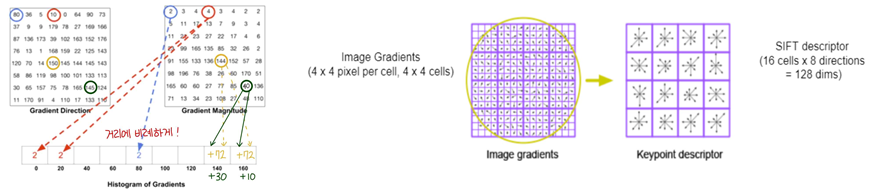

- Keypoint : ( x, y, scale, orientation, feature vector )
- Orient so that largest gradient points up ( possibly multiple solutions )

6️⃣ Enforce invariance to illumination change and camera saturation 

: Normalize to unit length to increase invariance to illumination. THen threshold all gradients, to become invariant to camera saturation.

<br>

##👉 Speeded-Up Robust Features ( SURF )
- Two-step Algorithm
  - Interest point detection through filtering/convolution
  - Feature classification using descriptor vector ( Harr wavelets )
- Good handling images with blurring and rotation
- NOT Good at handling viewpoint change and illumination change

<br>

### Integral image

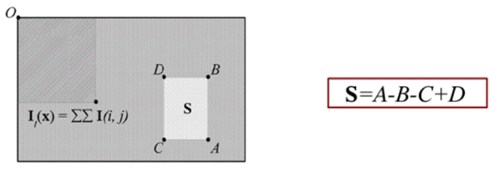

- Using integral images for major speed up 


### Hessian Matrix
- approximates LoG with Box Filter

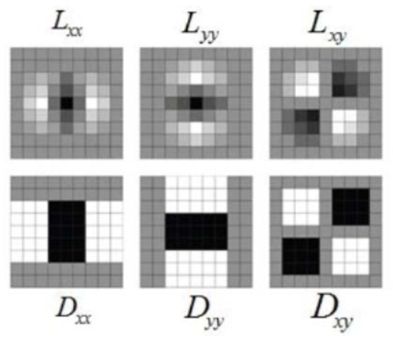

- Convolution with box filter can be easily calculated with the hep of integral images

        Det(H) = DxxDyy - (wDxy)^2

- Det < 0, eigenvalue가 서로 다른 부호 : 극값 ❌
- Det > 0, eigenvalue가 서로 같은 부호 : 극값 ⭕️


### Scale analysis with constant image size
- SIFT : Iteratively reducing the image size
- SURF : the use of integral images allows the up-scaling of the filter at constant cost
  - integral image를 사용하기 때문에 box filter 사이즈를 늘려도 해당 영상의 summation 값을 바로 구할 수 있으므로 효율적으로 사용 가능함

  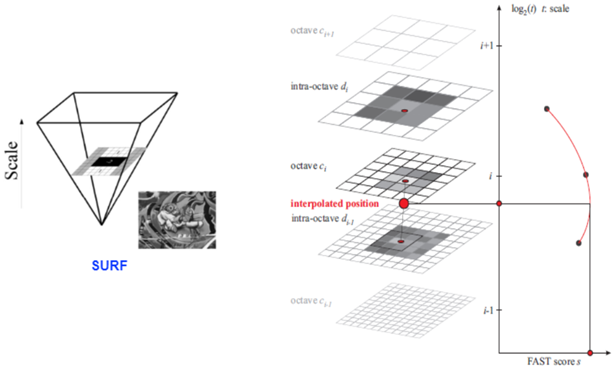

### Orientation Assignment

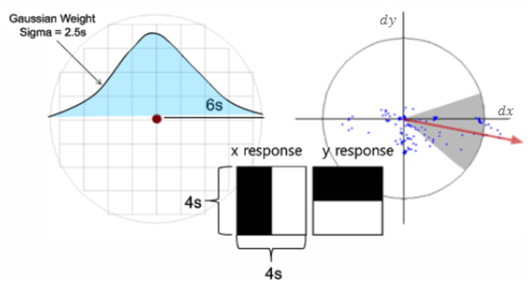

- x 방향과 y방향 gradient를 구하기 위한 **Haar-Wavelet Response** 사용
- 추출한 특징점 주변 6s 내의 pixel의 gradient를 구하는데 특징점에 가까울수록 튼 guassian weights를 곱함
- **Dominant Orientation** 
    
    : π/3크기의 방향 window를 이동시키면서 범위 내에 dx, dy를 합산하며, 합산된 2개의 결과를 통해 Local Orientation Vector 구함

### Description

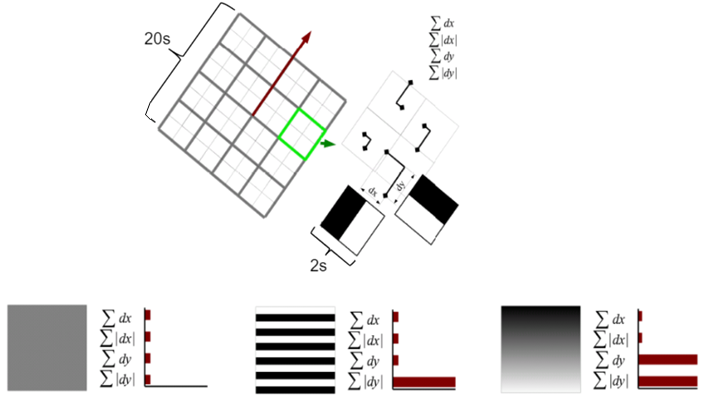

- Split the interest region ( 20s x 20s ) up into 4x4 square sub-regions
- Calculate Harr wavelet response dx and dy and weight the response with Gaussian kernel
- Sum the response over each sub-region for dx and dy, then sum the absolute value of response
- Normalize the vector into unit length
- 64 dim feature

### Matching
관심 영역에 sign of Laplacian (= Trace of Hessian Matrix) 을 사용

    Trace = Lxx + Lyy

- 탐지 중에 이미 Hessian Matrix가 계산되므로 계산 비용이 들지 않음
- The sign of trace of the Hessian matrix은 어두운 배경의 밝은 얼룩을 반대의 상황과 구별함

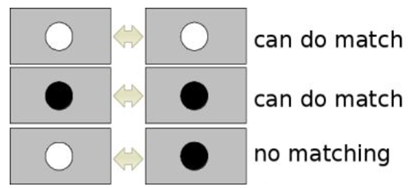

- 이 최소한의 정보만으로도 the descriptor의 성능을 저하시키지 않고도 더 빨리 일치시킬 수 있음

<br>

## 👉 Histogram of Oriented Gradient ( HOG )

1️⃣ Gradient Computation

2️⃣ Calculate Histogram of Gradients in 8x8 pixel( cell )

3️⃣ Block Normalization ( Constant Normalization )

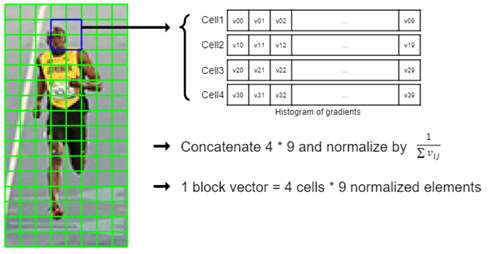

4️⃣ Calculate the HOG feature vector

   :  Image ( 64x128 ) ▶️ 105 blocks * 4 cells * 9 normalized elements

<br>

## 👉 Binary Robust Independent Elementary Features ( BRIEF )

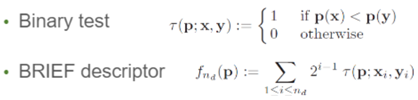

- Random selection of paris of intensity values
- fixed smapling pattern of 128, 256, 512 pairs
- Hamming distance to compare descriptor( XOR )

### Pros 
- compact, easy-computed, highly discriminative
- Fast matching using Hamming distance
- Good recognition performance

### Cons 
- More sensitive to image distortions and transformation, in paritcular to inplane rotation and scale change

<br>

##👉 Binary Robust Independent Scalable Keypoints ( BRISK )
1. Combination of SIFT-like scale-space keypoint detection and BRIEF-like descriptor
2. BRISK is a 512 bit binary descriptor that computes the weighted Gaussian average over a select pattern of points near the keypoint
3. It compares the values of specific pairs of Gaussian windows, leading to either 1 or 0, depending on which window in the pair was greater
4. The pairs to use are preselected in BRISK, This creates binary descriptors that work with hamming distance instead of Euclidean

<br>

##👉 ORB ( Oriented FAST and Rotated BRIEF )

: Image Pyramid를 적용한 FAST Algorithm으로 Corner을 구하고 특징
점을 기준으로 행렬의 회전변환을 통해 보완한 BRIEF Descriptor를 정의해 정합을 하는 Algorithm

- Robust to **Rotation** than BRIEF

### Fast Algorithm

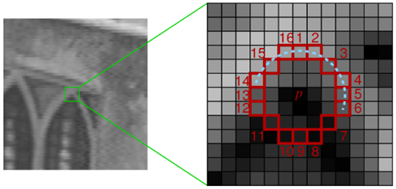



: 어떤 점 p가 corner인지 여부를 p를 중심으로 하는 반지름 3인 원 상의 16개 픽셀값을 보고 다음 조건을 만족하면 corner라고 판단
- p보다 일정값 이상 밝은(>p+t) 픽셀들이 n개 이상 연속되어 있음
- p보다 일정값 이상 어두운(<p-t) 픽셀들이 n개 이상 연속되어 있음

이때, n을 어떻게 잡느냐에 따라서 FAST-9,.., FAST-16과 같은 기준 생김

1️⃣ Find the position of the key points by FAST

2️⃣ Selecting N best points by Harris Corner Detector

3️⃣ Add a direction of points in Intensity Centroid

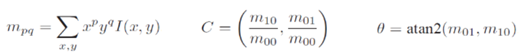

: 패치 내 화소의 무게중심좌표와 1차 모멘트를 통해 계산한 원점과의 벡터 각θ를
계산하고 행렬의 회전변환을 통해 rBRIEF(rotational BRIEF)를 구성

4️⃣ Extracting Binary descriptor by BRIEF

- 키포인트 방향에 따라 두 포인트을 잡게 되면, '각 비트 특성의 분산이 크고 평균이 0.5에 가깝다'라는 속성을 잃
고 더 분산하게 되며, 각 시험이 결과에 기여하기 때문에 테스트와 무관함

- 따라서, ORB는 이를 해결하기 위해 분산이 높고 평균이 0.5에 가까울 뿐 아니라 상관 관계가 없는 이진 테스트들에 대해 greedy search를 실행

5️⃣ Find low correlative pixel block in greedy algorithm

- Uncorrelation : each new pair will bring new information to the descriptor
- High Vatiance : more discriminative, since it responds differently to inputs

6️⃣ Receive a 256 bit descriptor

